<a href="https://colab.research.google.com/github/NayeliZuniga/Simulacion1/blob/main/Monte_Carlo(Prueba_y_Error).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monte Carlo **Prueba y Error**

A consideraciones del articulo se sabe
1. Generar una secuencia de {U_i}_{i=1}^2n ~ U(0,1)
2. Parejas ordenadas (U_i , U_{n+1}) para i=1,...,n
3. X_i= a + U_i⋅(b-a)
para i=1,...,n

Donde:
* a=limite inferior de la integral
* b=limite superior de la integral
4. f(X_i)
5. Contar los aciertos n_a tales que f(x_i)>c⋅U_{n+1}


Donde:
* c=valor que acota la funcion en todo el intervalo de integración

6. Estimar I calculando la media muestral I ≈ θ=c(b-a)(n_a/n)

Se hace el planteamiento solo de
I **=** *∫ f(x) dx* **≈** n/N

Importar las librerias necesarias

In [7]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from scipy.integrate import quad

Definir la funcion a revisar

In [3]:
def f(x):
 return np.sqrt(np.arctan(x))

In [ ]:
def espacio(a,b,p):   #a:limite inferior; b:limite superior;  p:particiones en x para graficar la función
  x = np.linspace(a,b,p)
  y = f(x)
  u1=rd.random()
  u2=rd.random()
  plt.plot(x,y)
  plt.axhline(f(a), color = "red")
  plt.axvline(a, color = "red")
  plt.scatter (u1,u2, color="green")

espacio(1,0,400)

In [5]:
def dardos (n):
 exitos=0
 for i in range(n):
  u1=rd.random()
  u2=rd.random()
  if u2<= f(u1):
   exitos+=1
 prob = exitos/n
 return prob

In [23]:
def experimento(m,a,b):
 lista=[]
 for i in range(m):
  d=dardos(i+1)
  lista.append(d)
 plt.plot(lista)
 plt.axhline(np.mean(lista),color='g')
 plt.axhline(np.mean(lista)+np.std(lista),color='r')
 plt.axhline(np.mean(lista)-np.std(lista),color='r')
 aprox=lista[-1]
 integral=quad(f,a,b)
 errabs=abs(aprox - integral[0])
 errrel=abs(errabs/(integral[0]))*100
 print(f"La aproximacion es {aprox}, con un error absoluto de {errabs} y uno relativo de {errrel} %")
 print(f"Con un intervalo de error que considera [{np.mean(lista)-np.std(lista)}<={np.mean(lista)}<={np.mean(lista)+np.std(lista)}]")


La aproximacion es 0.646, con un error absoluto de 0.01617665579202665 y uno relativo de 2.568443348566161 %
Con un intervalo de error que considera [0.5793579813026224<=0.6280576964597876<=0.6767574116169528]


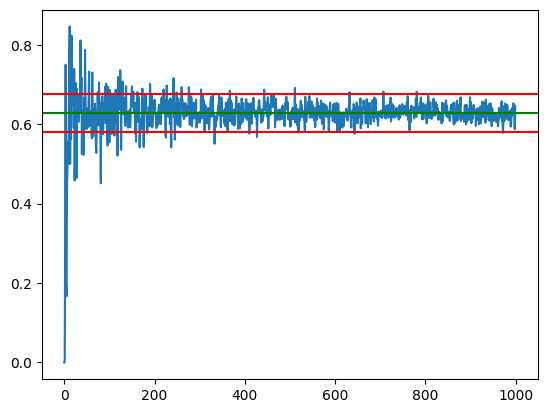

In [26]:
experimento(1000,0,1)